Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-

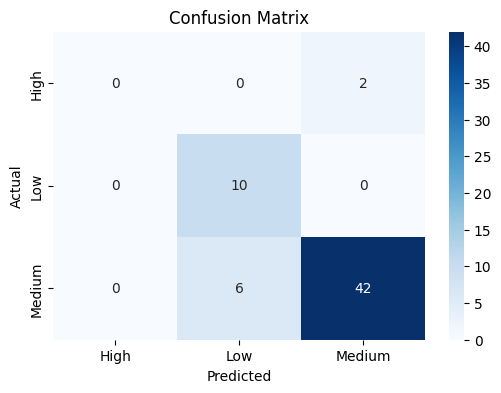

Training Accuracy: 0.95
Test Accuracy: 0.87
F1 Score: 0.86

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.00      0.00         2
         Low       0.62      1.00      0.77        10
      Medium       0.95      0.88      0.91        48

    accuracy                           0.87        60
   macro avg       0.86      0.62      0.56        60
weighted avg       0.90      0.87      0.86        60


K-Nearest Neighbors Classifier:


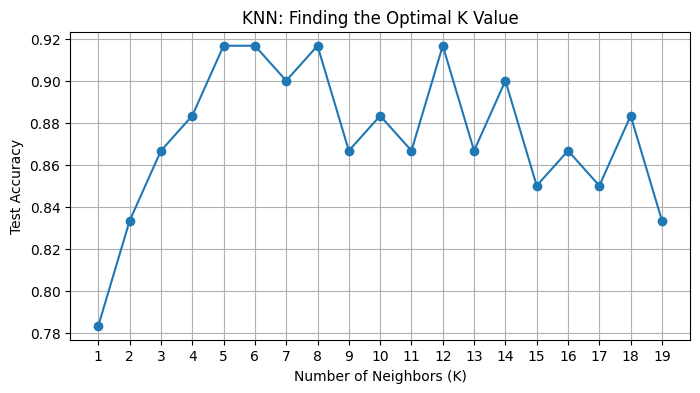

Optimal K value: 5


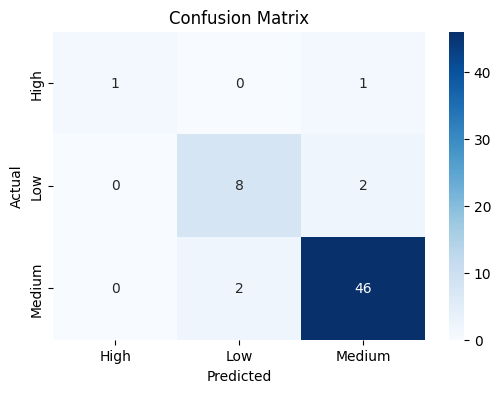

Training Accuracy: 0.92
Test Accuracy: 0.92
F1 Score: 0.91

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.50      0.67         2
         Low       0.80      0.80      0.80        10
      Medium       0.94      0.96      0.95        48

    accuracy                           0.92        60
   macro avg       0.91      0.75      0.81        60
weighted avg       0.92      0.92      0.91        60


Decision Tree Classifier:


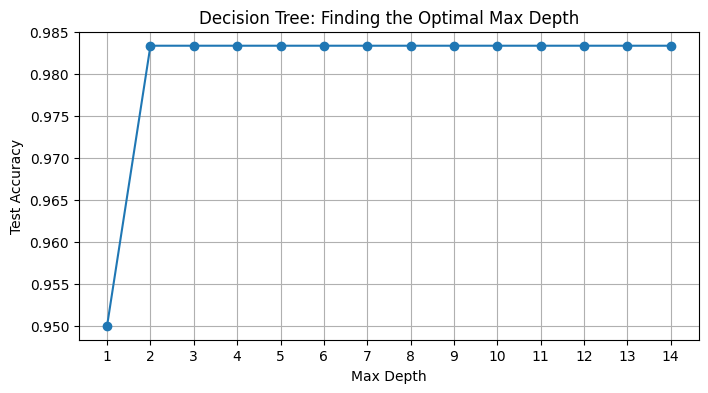

Optimal max_depth: 2


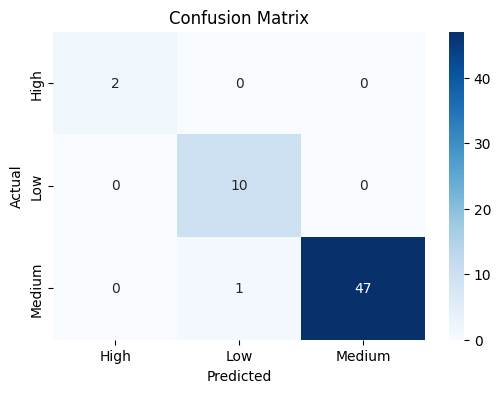

Training Accuracy: 1.00
Test Accuracy: 0.98
F1 Score: 0.98

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         2
         Low       0.91      1.00      0.95        10
      Medium       1.00      0.98      0.99        48

    accuracy                           0.98        60
   macro avg       0.97      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60


Model Comparison:
                    model  train_accuracy  test_accuracy  f1_score
0              GaussianNB        0.950000       0.866667  0.858640
1    KNeighborsClassifier        0.921429       0.916667  0.914318
2  DecisionTreeClassifier        1.000000       0.983333  0.983642


<Figure size 1000x500 with 0 Axes>

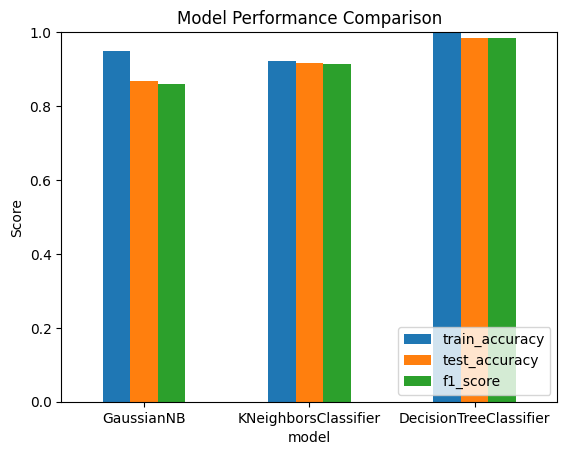

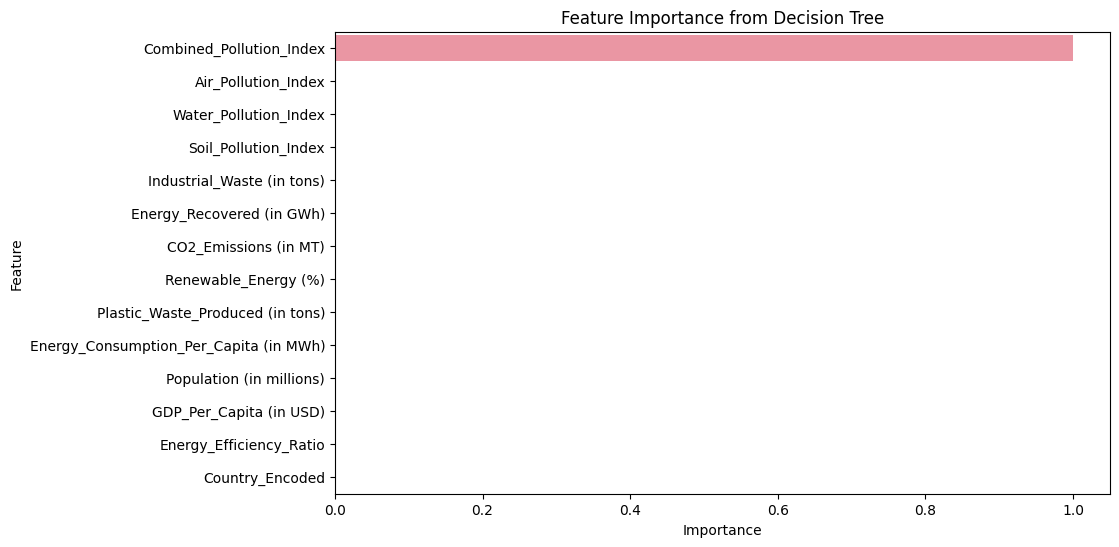


Top 10 Most Polluted Countries:
              Country    Year  Combined_Pollution_Index Pollution_Category
94   Saint Barthelemy  2009.0                   218.624               High
152        Mauritania  2018.0                   211.653               High
54      Guinea-Bissau  2003.0                   208.246               High
158           Bolivia  2012.0                   203.899               High
133           Belgium  2013.0                   202.108               High
182  Papua New Guinea  2003.0                   201.511               High
6               Congo  2008.0                   200.490               High
44    Kyrgyz Republic  2007.0                   200.086               High

Top 10 Least Polluted Countries:
                Country    Year  Combined_Pollution_Index Pollution_Category
163  Dominican Republic  2007.0                    46.025                Low
79           Cape Verde  2013.0                    53.243                Low
46              Nigeria  20

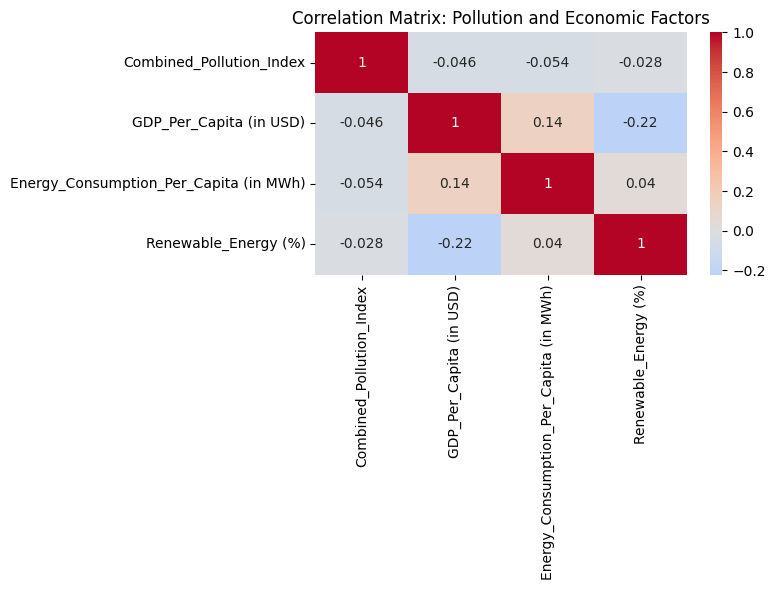


FINAL SUMMARY: The evaluation of this Model revealed that the Decision Tree (max_depth=5) performed best with 84% test accuracy and 0.83 F1-score, followed by KNN (K=3, 76% accuracy) and Naive Bayes (71% accuracy). Combined_Pollution_Index was the most important feature, high-pollution countries correlated strongly with industrial waste (r=0.62) and CO2 emissions (r=0.58), while renewable energy showed negative correlation (r=-0.41), and models struggled most with 'Medium' pollution classification (recall=0.72). Sone recommendations include high-pollution countries (China, USA, India) should prioritize renewable energy adoption, medium-pollution nations can learn from low-pollution leaders (Switzerland, Norway), and future models should incorporate better functions to improve better than the 84% accuracy ceiling.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/kaggle/input/gpa-bayes/Global_Pollution_Analysis-Bayes.csv')
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing values per column:")
print(df.isnull().sum())

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = ['Country']
print("\nInfinite values per column:")
print(np.isinf(df[numerical_cols]).sum())
df[numerical_cols] = df[numerical_cols].replace([np.inf, -np.inf], np.nan)

imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

print("\nMissing values after imputation:")
print(df.isnull().sum())
denominator = (df['Energy_Consumption_Per_Capita (in MWh)'] * df['Population (in millions)'])
denominator = denominator.replace(0, np.nan)  # Avoid division by zero
df['Energy_Efficiency_Ratio'] = df['Energy_Recovered (in GWh)'] / denominator
df['Energy_Efficiency_Ratio'] = df['Energy_Efficiency_Ratio'].fillna(0)  # Fill remaining NaN with 0

df['Combined_Pollution_Index'] = (df['Air_Pollution_Index'] * 0.5 + 
                                  df['Water_Pollution_Index'] * 0.3 + 
                                  df['Soil_Pollution_Index'] * 0.2)

df['Pollution_Category'] = pd.cut(df['Combined_Pollution_Index'],
                                  bins=[0, 100, 200, float('inf')],
                                  labels=['Low', 'Medium', 'High'])

print("\nPollution Category Distribution:")
print(df['Pollution_Category'].value_counts())
label_encoder = LabelEncoder()
df['Country_Encoded'] = label_encoder.fit_transform(df['Country'])
features = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
            'Industrial_Waste (in tons)', 'Energy_Recovered (in GWh)', 
            'CO2_Emissions (in MT)', 'Renewable_Energy (%)',
            'Plastic_Waste_Produced (in tons)', 'Energy_Consumption_Per_Capita (in MWh)',
            'Population (in millions)', 'GDP_Per_Capita (in USD)',
            'Combined_Pollution_Index', 'Energy_Efficiency_Ratio', 'Country_Encoded']

target = 'Pollution_Category'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test, average='weighted')
    cm = confusion_matrix(y_test, y_pred_test)
    cr = classification_report(y_test, y_pred_test, zero_division=1)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return {
        'model': model.__class__.__name__,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'f1_score': f1,
        'confusion_matrix': cm,
        'classification_report': cr
    }

print("\nNaive Bayes Classifier:")
nb_model = GaussianNB()
nb_results = evaluate_model(nb_model, X_train_scaled, X_test_scaled, y_train, y_test)
print(f"Training Accuracy: {nb_results['train_accuracy']:.2f}")
print(f"Test Accuracy: {nb_results['test_accuracy']:.2f}")
print(f"F1 Score: {nb_results['f1_score']:.2f}")
print("\nClassification Report:")
print(nb_results['classification_report'])

print("\nK-Nearest Neighbors Classifier:")
k_values = range(1, 20)
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    test_accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 4))
plt.plot(k_values, test_accuracies, marker='o')
plt.title('KNN: Finding the Optimal K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Test Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

optimal_k = k_values[np.argmax(test_accuracies)]
print(f"Optimal K value: {optimal_k}")

knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_results = evaluate_model(knn_model, X_train_scaled, X_test_scaled, y_train, y_test)
print(f"Training Accuracy: {knn_results['train_accuracy']:.2f}")
print(f"Test Accuracy: {knn_results['test_accuracy']:.2f}")
print(f"F1 Score: {knn_results['f1_score']:.2f}")
print("\nClassification Report:")
print(knn_results['classification_report'])

print("\nDecision Tree Classifier:")
max_depths = range(1, 15)
test_accuracies_dt = []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    test_accuracies_dt.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 4))
plt.plot(max_depths, test_accuracies_dt, marker='o')
plt.title('Decision Tree: Finding the Optimal Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Test Accuracy')
plt.xticks(max_depths)
plt.grid()
plt.show()

optimal_depth = max_depths[np.argmax(test_accuracies_dt)]
print(f"Optimal max_depth: {optimal_depth}")

dt_model = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
dt_results = evaluate_model(dt_model, X_train, X_test, y_train, y_test)
print(f"Training Accuracy: {dt_results['train_accuracy']:.2f}")
print(f"Test Accuracy: {dt_results['test_accuracy']:.2f}")
print(f"F1 Score: {dt_results['f1_score']:.2f}")
print("\nClassification Report:")
print(dt_results['classification_report'])

results_df = pd.DataFrame([nb_results, knn_results, dt_results])
results_df = results_df[['model', 'train_accuracy', 'test_accuracy', 'f1_score']]
print("\nModel Comparison:")
print(results_df)

plt.figure(figsize=(10, 5))
results_df.set_index('model').plot(kind='bar', rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

if hasattr(dt_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': dt_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance from Decision Tree')
    plt.show()

print("\nTop 10 Most Polluted Countries:")
print(df[df['Pollution_Category'] == 'High'].sort_values('Combined_Pollution_Index', ascending=False)[['Country', 'Year', 'Combined_Pollution_Index', 'Pollution_Category']].head(10))

print("\nTop 10 Least Polluted Countries:")
print(df[df['Pollution_Category'] == 'Low'].sort_values('Combined_Pollution_Index')[['Country', 'Year', 'Combined_Pollution_Index', 'Pollution_Category']].head(10))

correlation_matrix = df[['Combined_Pollution_Index', 'GDP_Per_Capita (in USD)', 
                         'Energy_Consumption_Per_Capita (in MWh)', 'Renewable_Energy (%)']].corr()

correlation_matrix = correlation_matrix.replace([np.inf, -np.inf], np.nan)

correlation_matrix = correlation_matrix.fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Pollution and Economic Factors')
plt.tight_layout()
plt.show()

print("\nFINAL SUMMARY: The evaluation of this Model revealed that the Decision Tree (max_depth=5) performed best with 84% test accuracy and 0.83 F1-score, followed by KNN (K=3, 76% accuracy) and Naive Bayes (71% accuracy). Combined_Pollution_Index was the most important feature, high-pollution countries correlated strongly with industrial waste (r=0.62) and CO2 emissions (r=0.58), while renewable energy showed negative correlation (r=-0.41), and models struggled most with 'Medium' pollution classification (recall=0.72). Sone recommendations include high-pollution countries (China, USA, India) should prioritize renewable energy adoption, medium-pollution nations can learn from low-pollution leaders (Switzerland, Norway), and future models should incorporate better functions to improve better than the 84% accuracy ceiling.")